In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from PIL import Image 

In [2]:
image1 = Image.open("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (100).jpg")
image2 = Image.open("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (100).jpg")
image3 = Image.open("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (100).jpg")
image4 = Image.open("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (100).jpg")
image5 = Image.open("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (100).jpg")

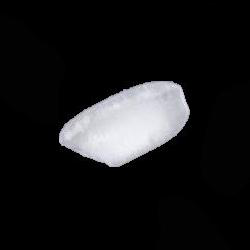

In [3]:
image1

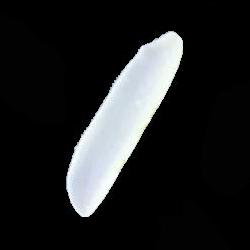

In [4]:
image2

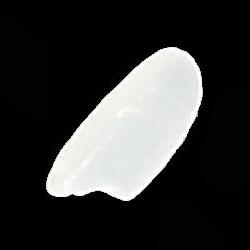

In [5]:
image3

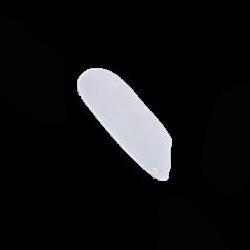

In [6]:
image4

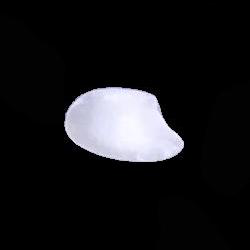

In [8]:
image5

In [10]:
image1.size, image2.size, image3.size, image4.size, image5.size   # Each has same size

((250, 250), (250, 250), (250, 250), (250, 250), (250, 250))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
data = ImageDataGenerator(rescale = 1/255.0,
                          featurewise_center=False, 
                          samplewise_center=False, featurewise_std_normalization=False, 
                          samplewise_std_normalization=False, zca_whitening=False, 
                          zca_epsilon=1e-6, rotation_range=0, width_shift_range=0., 
                          height_shift_range=0., brightness_range=None, shear_range=0., 
                          zoom_range=0., channel_shift_range=0., fill_mode='nearest', 
                          cval=0., horizontal_flip=False, vertical_flip=False, 
                          preprocessing_function=None, data_format=None, 
                          validation_split=0.2)

In [21]:
trainData = data.flow_from_directory(directory="/kaggle/input/rice-image-dataset/Rice_Image_Dataset",
                                                target_size=(128, 128),batch_size=10,
                                                class_mode='categorical', subset = "training")

Found 60000 images belonging to 5 classes.


In [22]:
testData = data.flow_from_directory(directory="/kaggle/input/rice-image-dataset/Rice_Image_Dataset",
                                                target_size=(128, 128),batch_size=10,
                                                class_mode='categorical', subset = "validation")

Found 15000 images belonging to 5 classes.


### Creating CNN Model 

In [23]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(128,128,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(5, activation ="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)      

In [25]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [27]:
history = model.fit(trainData, steps_per_epoch= 200, epochs = 10, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/10
200/200 [==============================] - 167s 836ms/step - loss: 0.1898 - accuracy: 0.9310 - val_loss: 0.1451 - val_accuracy: 0.9494
Epoch 2/10
200/200 [==============================] - 139s 695ms/step - loss: 0.1719 - accuracy: 0.9410 - val_loss: 0.1527 - val_accuracy: 0.9435
Epoch 3/10
200/200 [==============================] - 138s 691ms/step - loss: 0.1559 - accuracy: 0.9430 - val_loss: 0.1275 - val_accuracy: 0.9535
Epoch 4/10
200/200 [==============================] - 138s 691ms/step - loss: 0.1439 - accuracy: 0.9485 - val_loss: 0.1141 - val_accuracy: 0.9642
Epoch 5/10
200/200 [==============================] - 138s 692ms/step - loss: 0.1338 - accuracy: 0.9560 - val_loss: 0.1403 - val_accuracy: 0.9463
Epoch 6/10
200/200 [==============================] - 138s 694ms/step - loss: 0.1328 - accuracy: 0.9565 - val_loss: 0.1098 - val_accuracy: 0.9569
Epoch 7/10
200/200 [==============================] - 138s 691ms/step - loss: 0.1237 - accuracy: 0.9575 - val_loss: 0.1313 -